In [27]:
import matplotlib.pyplot as plt
from sklearn import datasets,svm,metrics
from sklearn import cross_validation,preprocessing
import pandas as pd
from sklearn import ensemble

In [28]:
m = pd.read_csv('mushrooms1.csv')

In [29]:
m.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [30]:
m.head()#m.iloc[1:4, 20:]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [31]:
m['habitat'].value_counts()

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [32]:
#label encoder
z=m['class']

for cols in m.columns:
    m[cols]=preprocessing.LabelEncoder().fit_transform(m[cols])

m.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [33]:
m['class']

0       1
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      1
18      1
19      1
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
       ..
8094    0
8095    1
8096    0
8097    1
8098    1
8099    0
8100    0
8101    1
8102    0
8103    0
8104    0
8105    0
8106    0
8107    0
8108    1
8109    0
8110    0
8111    0
8112    0
8113    1
8114    1
8115    0
8116    1
8117    1
8118    1
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [34]:
m.corr()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [35]:
import seaborn as sns
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

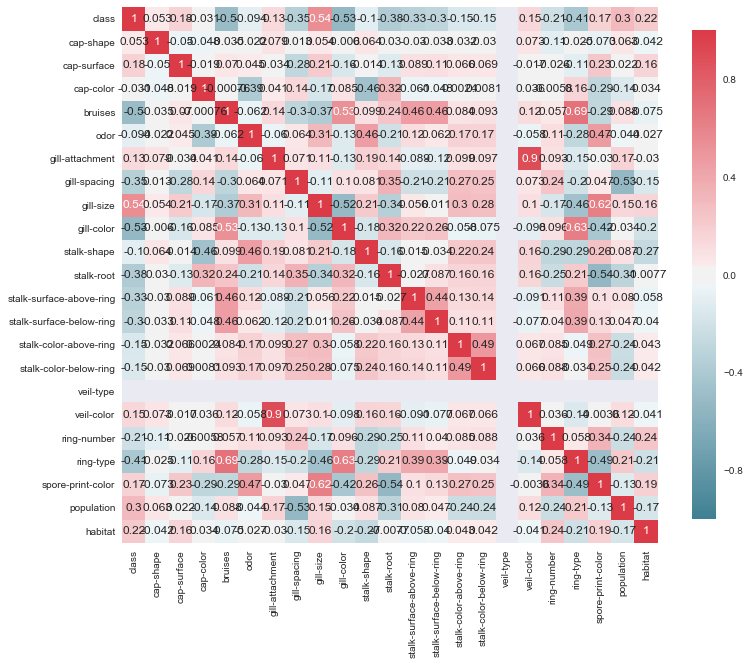

In [36]:
plot_correlation_map(m)
plt.show()

In [37]:
m.drop(['cap-shape','cap-color',], axis=1, inplace=True)

In [38]:
del m['odor']

In [39]:
m.iloc[1:4, :]

,class,cap-surface,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,0,2,1,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,1,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,3,1,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5


In [40]:
m['habitat'].value_counts()

0    3148
1    2148
4    1144
2     832
5     368
3     292
6     192
Name: habitat, dtype: int64

In [41]:
del m['veil-type']

In [42]:
m.head()

,class,cap-surface,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,1,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,2,1,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,1,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,3,1,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,2,0,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


In [43]:
del m['class']

In [44]:
m=preprocessing.scale(m)

In [45]:
x_Train,x_Test,y_Train,y_Test=cross_validation.train_test_split(m,z,test_size=0.1)

In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn import decomposition
pca = decomposition.PCA()
x_std = sc.fit_transform(m)
#pca.n_components = 12

pca.fit(x_std)

#wow=pca.fit_transform(x_std)
v=pca.explained_variance_[:]
v


array([ 3.63329052,  2.38526529,  2.36496271,  2.12177064,  1.54580834,
        1.24026429,  0.82307646,  0.70391964,  0.68583554,  0.55281102,
        0.51180299,  0.42827314,  0.32942829,  0.22042587,  0.17500776,
        0.13339229,  0.07385438,  0.07081083])

In [125]:
import time
total = v.sum()
i = 0
sum = 0
while i < v.shape[0] :
    sum = sum + v[i]
    if sum/total > 0.95 :
        break
    i = i + 1
pca.n_components = i
x_pca = pca.transform(x_std)
x_pca.shape
print(i)

12


In [126]:
start = time.time()
x_Train,x_Test,y_Train,y_Test=cross_validation.train_test_split(wow,z,test_size=0.1,random_state=40)
clf= svm.SVC(kernel = 'rbf', C =50,gamma=0.001)
clf.fit(x_Train,y_Train)
print(clf.score(x_Test,y_Test))
end = time.time()
print(end - start)

0.985239852399
0.4782698154449463


In [127]:
start = time.time()
x_Train,x_Test,y_Train,y_Test=cross_validation.train_test_split(m,z,test_size=0.1,random_state=40)
clf= svm.SVC(kernel = 'rbf', C =50,gamma=0.001)
clf.fit(x_Train,y_Train)
print(clf.score(x_Test,y_Test))
end = time.time()
print(end - start)

0.985239852399
0.4813058376312256


In [104]:
y_pred = clf.predict(x_Test)
print(metrics.classification_report(y_Test,y_pred))
print(metrics.confusion_matrix(y_Test,y_pred))

             precision    recall  f1-score   support

          e       0.99      0.97      0.98       432
          p       0.96      0.99      0.98       381

avg / total       0.98      0.98      0.98       813

[[418  14]
 [  5 376]]


In [22]:
clf1= svm.SVC(kernel = 'rbf', C =1,gamma =.1)
clf1.fit(x_Train,y_Train)
y_pred1 = clf1.predict(x_Test)
clf1.score(x_Test,y_Test)

1.0

In [23]:
#y_pred = clf.predict(x_Test)
print(metrics.classification_report(y_Test,y_pred1))
print(metrics.confusion_matrix(y_Test,y_pred1))

             precision    recall  f1-score   support

          e       1.00      1.00      1.00       429
          p       1.00      1.00      1.00       384

avg / total       1.00      1.00      1.00       813

[[429   0]
 [  0 384]]


In [124]:
clf2=ensemble.RandomForestClassifier()
clf2.fit(x_Train,y_Train)
y_pred2=clf.predict(x_Test)
clf2.score(x_Test,y_Test)

1.0